# Problem statement: 
*   I am going to explore my data(salaried employees of a city hyderabad) with clustering algorithms. My intention is to see range of settled employees in hyderabad city like well-settled,still struggling to settle,fresher to get settle,stress less living employees,not well settled.... based on their experience, salary, qualification,designation, working company..etc
*   Here i am using KMeans, KMedoids, SOM clustering algorithms and I am going to compare these clustering algorithms whether they are giving the clusters as i thought and conclude with better clustering algorithm for this dataset  

# About the dataset:
*   Hyderabad Salaried Employees Dataset
*   It is a dataset with 28848 records with 9 attributes(columns). I had chosen the dataset at kaggle. It is a dataset of salaried employee data with their name,company,designation, experience,location and salary,category,etc., 
*    [kaggle link for dataset](https://www.kaggle.com/datasets/shubamsumbria/hyderabad-salaried-employees-dataset-clustering/download?datasetVersionNumber=2)

## 1. Importing Required Libararies and Modules

In [1]:
!pip install minisom  #minimalistic SOM to perform self-organizing feature maps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from minisom import MiniSom
from sklearn.preprocessing import LabelEncoder,normalize
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn_extra.cluster import KMedoids

# 2. Loading Dataset into Pandas' DataFrame

In [4]:
df = pd.read_csv("hyderabad-salaried-employees.csv")
df.head()

,candidateName,companyName,designation,experienceMas,locationCurrentMas,qualificationMas,qualificationMas2,salary,Category
0,Ruchismita Dash,Amdocs,Software Developer,2 Year(s) 1 Month(s),Hyderabad/ Secunderabad,BE/ B.Tech (Engineering),NaN,Rs. 6.71 lacs,HYDERABAD-SALARIED
1,MANISHA DAS,APOLLO HOSPITALS ENTERPRISES LIMITED,SENIOR EXECUTIVE-OPERATIONS,5 Year(s) 9 Month(s),Hyderabad/ Secunderabad,MBA/ PGDM,B.Pharm. (Pharmacy),Rs. 5.0 lacs,HYDERABAD-SALARIED
2,C J GEETHA PRIYA,propertyoneshop.com,System Administrator,4 Year(s) 4 Month(s),Hyderabad/ Secunderabad,B.Com. (Commerce),NaN,Rs. 84.0 lacs,HYDERABAD-SALARIED
3,SRIKANTH,Axis Bank Ltd,NaN,7 Year(s) 11 Month(s),Hyderabad/ Secunderabad,NaN,MBA/ PGDM,Rs. 7.0 lacs,HYDERABAD-SALARIED
4,Madduri Srinivas,CTS,Associate Projects,6 Year(s) 8 Month(s),Hyderabad/ Secunderabad,B.Com. (Commerce),MCA/ PGDCA,Rs. 8.05 lacs,HYDERABAD-SALARIED


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28847 entries, 0 to 28846
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   candidateName       28843 non-null  object
 1   companyName         28806 non-null  object
 2   designation         24217 non-null  object
 3   experienceMas       28847 non-null  object
 4   locationCurrentMas  28847 non-null  object
 5   qualificationMas    23971 non-null  object
 6   qualificationMas2   15449 non-null  object
 7   salary              28847 non-null  object
 8   Category            28847 non-null  object
dtypes: object(9)
memory usage: 2.0+ MB


In [6]:
df.describe()

,candidateName,companyName,designation,experienceMas,locationCurrentMas,qualificationMas,qualificationMas2,salary,Category
count,28843,28806,24217,28847,28847,23971,15449,28847,28847
unique,27288,15153,12636,492,3,51,48,1560,1
top,- -,Currently Unemployed,Currently Unemployed,10 Year(s),Hyderabad/ Secunderabad,BE/ B.Tech (Engineering),MBA/ PGDM,Rs. 6.0 lacs,HYDERABAD-SALARIED
freq,27,804,778,966,28841,8922,5448,1695,28847


# Data Pre-processing and Feature selection

**Checking Missing Values in each Column**

In [7]:
df.isna().sum()

candidateName             4
companyName              41
designation            4630
experienceMas             0
locationCurrentMas        0
qualificationMas       4876
qualificationMas2     13398
salary                    0
Category                  0
dtype: int64

**Visualizing Missing Pattern in Dataset**

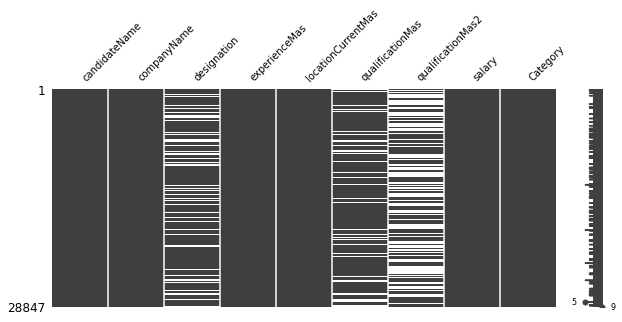

In [8]:
msno.matrix(df, figsize=(10,4), fontsize=10)

**Droping Rows from Some Columns containing less number of NaN Values and Replacing "NaN" Values in the columns (where NaN values are high in number) with "Missing"(str)**



*   Here we can see that the columns candidateName, companyName, designation has less number of NaN values. So, we drop the rows from candidateName, companyName, designation columns
*   On the other hand, the columns 'qualificationMas' and 'qualificationMas2' are related to each other and have more number pf NaN values. So, we replace NaN values in 'qualificationMas' and 'qualificationMas2' with "Missing"



In [9]:
#Droping Rows from 'companyName' and 'designation' containing NaN values
df.dropna(axis=0, inplace=True, subset=['companyName', 'designation','candidateName','Category','locationCurrentMas'])

final = df.copy(deep=True) # Copying dataframe for final split in excel files

In [10]:
#Replacing "NaN" Values in 'qualificationMas' and 'qualificationMas2' with "Missing" (str)
df['qualificationMas'].fillna(value='Missing', inplace=True)
df['qualificationMas2'].fillna(value='Missing', inplace=True)


**Now visualize missing pattern in the dataset to check whether we are correct or not**

In [11]:
df.isna().sum()

candidateName         0
companyName           0
designation           0
experienceMas         0
locationCurrentMas    0
qualificationMas      0
qualificationMas2     0
salary                0
Category              0
dtype: int64

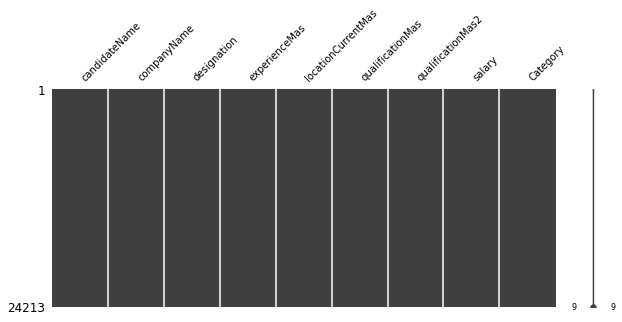

In [12]:
msno.matrix(df, figsize=(10,4), fontsize=10)

**Checking Unique Values in each Column**

In [13]:
df.nunique()

candidateName         23194
companyName           13066
designation           12634
experienceMas           480
locationCurrentMas        3
qualificationMas         51
qualificationMas2        49
salary                 1433
Category                  1
dtype: int64

**Droping Irrelevant Columns**


*   Here we can see that candidate name is totally unique... So it can't be used in distinguishing the clusters.
*   on the other hand, category is same for all data points, so it is also not used in distinguishing the clusters.
*   locationCurrentMas has only 3 unique values. So lets us check what is frequency of each unique value


In [14]:
#Checking Values in 'locationCurrentMas'
df.locationCurrentMas.value_counts()

Hyderabad/ Secunderabad    24207
Hyderabad                      3
Hyderabad                      3
Name: locationCurrentMas, dtype: int64



*   As the frequency of Hyderabad/ Secunderabad value is 28841,Hyderabad is 3, This column is also not used for distinguishing the clusters



In [15]:
# Droping Unwanted/Notrelevent Columns from dataFrame
df.drop(columns=['candidateName','Category','locationCurrentMas'], inplace=True)

# Encoding--- Formatting Columns of Data in Usable Form

In [16]:
# Convert 'Rs. X Lakhs' [Object] in 'X'[float]
df['salary'] = df['salary'].astype('str')
df[df.columns[5]] = df[df.columns[5]].apply(lambda x: x.replace('Rs. ','')).apply(lambda x: x.replace(' lacs','')).astype(np.float64)

# Convert 'A Year(s) B Month(s)' [object] in Month(s) [float]
def process_exp(dataframe,colid):
    df['experienceMas'] = df['experienceMas'].astype('str') # from object type to str type [to use split function]
    df['experienceMas'].replace('Fresher','0 Year(s) 0 Month(s)', inplace=True) #changing data in single format ['Fresher' = '0 Year(s) 0 Month(s)']
    for rowid in range(dataframe.shape[0]):
        element=dataframe.iloc[rowid,colid].split(' ') # Splitting str 'A Year(s) B Month(s)' from each row using space into ['A','Year(s)','B','Month(s)']
        if len(element)==4:
            year,month=(element[0],element[2]) # Getting A and B as no. of years and months
        else:
            year,month=(element[0],0) #if there is no month value then only take years
        dataframe.iloc[rowid,colid]=(12*float(year))+float(month) # multiply years with 12 and add months [to get no. of months of experience]
    dataframe.iloc[:,2]=pd.to_numeric(dataframe.experienceMas) # Convert str to float type
    return dataframe

df=process_exp(dataframe=df, colid=2)

#LabelEncoding
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])
df.head()

,companyName,designation,experienceMas,qualificationMas,qualificationMas2,salary
0,777,9365,25.0,15,43,6.71
1,265,7708,69.0,38,4,5.00
2,12683,10809,52.0,2,43,84.00
4,1928,1430,80.0,2,33,8.05
5,7180,10090,242.0,45,48,16.00




*   Here, we converted the object datatype to float datatype and years and months in experience column to months 



# Normalization 



*   Let us see how our data is




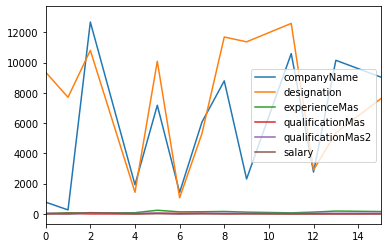

In [17]:
X = df[["companyName",	"designation"	,"experienceMas","qualificationMas",	"qualificationMas2","salary"]]
ax =plt.plot(X.index,X)
plt.xlim(0,15)
plt.legend(ax[:],["companyName",	"designation"	,"experienceMas","qualificationMas",	"qualificationMas2","salary"]);




*   From the figure, we can observe that the attributes "companyName" and "designation" are at same scale where as the attributes "experienceMas","qualificationMas","qualificationMas2","salary" are at same scale. The difference between these scales cannot give the good results. So we need to normalize the data inorder to bring all attributes to same scale.



In [18]:
data = pd.DataFrame(normalize(df,axis=0), columns=df.columns)
data.head()

,companyName,designation,experienceMas,qualificationMas,qualificationMas2,salary
0,0.000695,0.008324,0.001108,0.004041,0.007620,0.001818
1,0.000237,0.006851,0.003058,0.010237,0.000709,0.001355
2,0.011345,0.009607,0.002305,0.000539,0.007620,0.022758
3,0.001725,0.001271,0.003546,0.000539,0.005848,0.002181
4,0.006422,0.008968,0.010726,0.012123,0.008506,0.004335




*   Data after normalizing



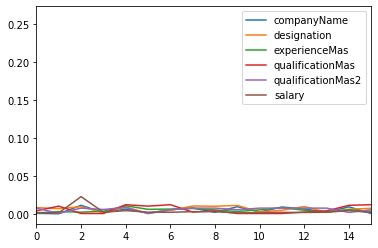

In [19]:
X = data[["companyName",	"designation"	,"experienceMas","qualificationMas",	"qualificationMas2","salary"]]
ax =plt.plot(X.index,X)
plt.xlim(0,15)
plt.legend(ax[:],["companyName",	"designation"	,"experienceMas","qualificationMas",	"qualificationMas2","salary"]);




*   From the figure, we observe that the attributes are in same scale



# Feature - correlation



*   Let us see the relation between each pair of variables. Inorder to find the relation between these variables, we use correlation(a statistical measure that expresses the extent to which two variables are linearly related)







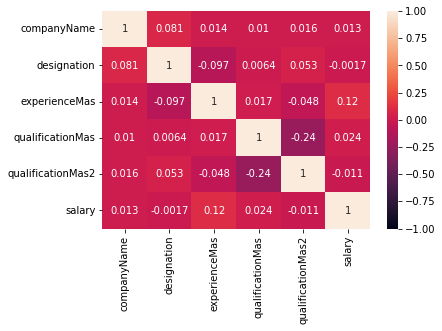

In [20]:
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)



*   From the above heatmap, we can observe that none of the elements are highly correlated with each other. So we should use these six columns to form clusters




# Principal Component Analysis
*  Visualizing clustered scatter plot of such a high-dimensional data isn't feasible.

*  To get two of all columns for such a plot, I utilized the Principal Component Analysis.

In [21]:
# define transform
pca = PCA(n_components=2)
# prepare transform on dataset
pca.fit(data)
# apply transform to dataset
data = pca.transform(data)

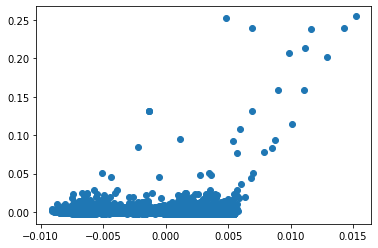

In [22]:

plt.scatter(data.T[1,:],data.T[0,:])

# Find Optimal Value of K

**Elbow Method**

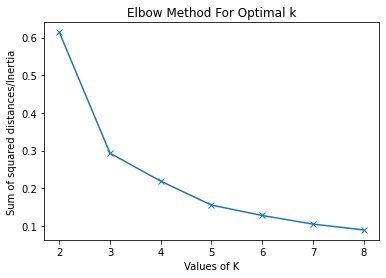

In [23]:
Sum_of_squared_distances = []
K = range(2,9)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(data)
    Sum_of_squared_distances.append(kmeans.inertia_)

plt.plot(K,Sum_of_squared_distances,'x-')
plt.xlabel('Values of K')
plt.ylabel('Sum of squared distances/Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


*   Perform K-means clustering with all these different values of K. For each of the K values, we calculate average distances to the centroid across all data points.
*   when Plotted these points i find the point where the average distance from the centroid falls suddenly here it is 3



**Silhouette analysis**

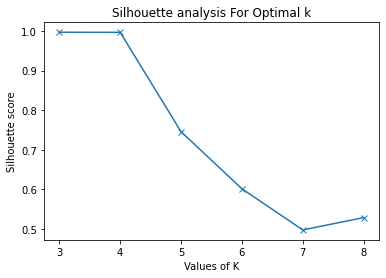

In [42]:
range_n_clusters = [3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(data)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg.append(silhouette_score(data, cluster_labels))

plt.plot(range_n_clusters,silhouette_avg,'x-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()



*   The silhouette Method is used in combination with the Elbow Method for a more confident decision.
*   We see that the silhouette score is maximized at k = 3. So, we will take 3 clusters.



**From the above two methods, we find 3 as the optimal k value. So,we will take 3 clusters**

# KMeans Clustering Algorithm

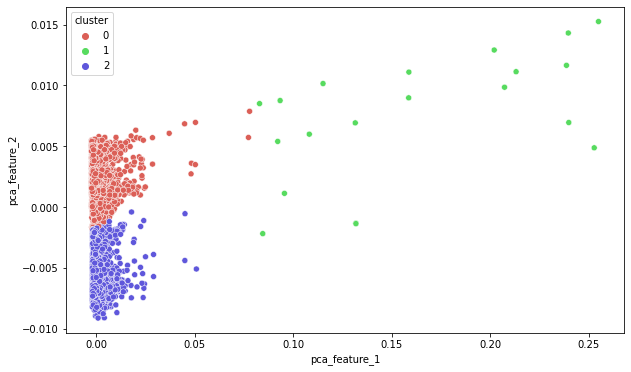

In [25]:
clusters=3 #from above analysis for optimal value of k
kmeans = KMeans(n_clusters=clusters, init='k-means++')
kmeans.fit(data)
pred = kmeans.predict(data)
data = pd.DataFrame(data, columns = ['pca_feature_1','pca_feature_2']) # features selected by using PCA
data['cluster'] = pred

# Plot Showing Clusters using features [2] selected from PCA
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x=data.pca_feature_1, y=data.pca_feature_2, hue='cluster', palette=sns.color_palette("hls",clusters), legend="full")
plt.show()


In [26]:
final['cluster'] = pred
final = final.sort_values(by = 'cluster', ignore_index=True)
final.head(17000)

,candidateName,companyName,designation,experienceMas,locationCurrentMas,qualificationMas,qualificationMas2,salary,Category,cluster
0,Ruchismita Dash,Amdocs,Software Developer,2 Year(s) 1 Month(s),Hyderabad/ Secunderabad,BE/ B.Tech (Engineering),NaN,Rs. 6.71 lacs,HYDERABAD-SALARIED,0
1,Dharani Nadh Bayyana,Infosys Technologies Ltd,Test Analyst,6 Year(s) 6 Month(s),Hyderabad/ Secunderabad,B.Sc. (Science),ME/ M.Tech./ MS (Engg/ Sciences),Rs. 6.0 lacs,HYDERABAD-SALARIED,0
2,Sanket Patni,Hsbc Software Development India Pvt Ltd,Software Test Engineer,3 Year(s) 8 Month(s),Hyderabad/ Secunderabad,BE/ B.Tech (Engineering),NaN,Rs. 6.0 lacs,HYDERABAD-SALARIED,0
3,vasavi,Randstad India Ltd.,Analyst,4 Year(s) 3 Month(s),Hyderabad/ Secunderabad,BE/ B.Tech (Engineering),NaN,Rs. 5.08 lacs,HYDERABAD-SALARIED,0
4,Anil SiRONMANI,Deloitte Support Services India Pvt Ltd,Debtor Management,10 Year(s),Hyderabad/ Secunderabad,B.Com. (Commerce),MBA/ PGDM,Rs. 7.3 lacs,HYDERABAD-SALARIED,0
...,...,...,...,...,...,...,...,...,...,...
16995,venkata ramana kothuri,y.sapphireTVS,manager-audit&accounts,31 Year(s) 4 Month(s),Hyderabad/ Secunderabad,B.V.Sc. (Veterinary Science),NaN,Rs. 7.0 lacs,HYDERABAD-SALARIED,0
16996,Jyotsna Bhosale,Tata Teleservices ( M ) Ltd,Assistant Manager - HR- Lead Assocaite Managment,18 Year(s) 6 Month(s),Hyderabad/ Secunderabad,B.Sc. (Science),Diploma-Other Diploma,Rs. 11.02 lacs,HYDERABAD-SALARIED,0
16997,S Murhty,Mylan Laboratories Ltd,Asst. Manager,17 Year(s) 10 Month(s),Hyderabad/ Secunderabad,B.Sc. (Science),NaN,Rs. 5.06 lacs,HYDERABAD-SALARIED,0
16998,SRINIVASA GUDIMETLA,J.B CHEMICALS & PHARMACEUTICALS LIMITED,REGIONAL COMMERCIAL EXECUTIVE (SOUTH),6 Year(s),Hyderabad/ Secunderabad,B.Pharm. (Pharmacy),NaN,Rs. 6.0 lacs,HYDERABAD-SALARIED,0


# kmedoids

In [28]:
data2 = normalize(df,axis=0)

In [29]:
# define transform
pca = PCA(n_components=2)
# prepare transform on dataset
pca.fit(data2)
# apply transform to dataset
data2 = pca.transform(data2)

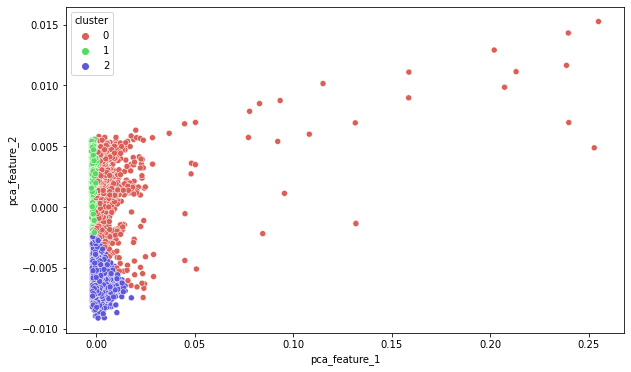

In [30]:
kmedoidsmodel = KMedoids(n_clusters= 3)
y_kmedoidsmodel= kmedoidsmodel.fit(data2)
pred = y_kmedoidsmodel.predict(data2)
data2 = pd.DataFrame(data2, columns = ['pca_feature_1','pca_feature_2']) # features selected by using PCA
data2['cluster'] = pred

# Plot Showing Clusters using features [2] selected from PCA
plt.figure(figsize=(10,6))
sns.scatterplot(data=data2, x=data2.pca_feature_1, y=data2.pca_feature_2, hue='cluster', palette=sns.color_palette("hls",clusters), legend="full")
plt.show()

In [31]:
final['cluster'] = pred
final = final.sort_values(by = 'cluster', ignore_index=True)
final.head(17000)

,candidateName,companyName,designation,experienceMas,locationCurrentMas,qualificationMas,qualificationMas2,salary,Category,cluster
0,Ramakrishna Kaviti,Surabhi Enterprises,Faculty,31 Year(s),Hyderabad/ Secunderabad,NaN,MBA/ PGDM,Rs. 30.0 lacs,HYDERABAD-SALARIED,0
1,talariraju,Currently Unemployed,Currently Unemployed,8 Year(s) 9 Month(s),Hyderabad/ Secunderabad,NaN,MFA (Fine Arts),Rs. 30.1 lacs,HYDERABAD-SALARIED,0
2,A Ambeerao,Milly glass ; Mombasa ; Kenya,Manager furnace and Batch house,21 Year(s),Hyderabad/ Secunderabad,Diploma-Engineering,NaN,Rs. 20.0 lacs,HYDERABAD-SALARIED,0
3,KANAKA REDDY,Novartis Healthcare Pvt Ltd,TRANSITION SPECIALIST,8 Year(s),Hyderabad/ Secunderabad,B.Com. (Commerce),MBA/ PGDM,Rs. 6.5 lacs,HYDERABAD-SALARIED,0
4,Archana Chandel,Ibm India Pvt Ltd,Senior System Analyst,12 Year(s) 7 Month(s),Hyderabad/ Secunderabad,BE/ B.Tech (Engineering),NaN,Rs. 15.0 lacs,HYDERABAD-SALARIED,0
...,...,...,...,...,...,...,...,...,...,...
16995,Vijay Prakash Dubey,Credit Suisse Services India Pvt. Ltd.,Lead Business Analyst,5 Year(s) 11 Month(s),Hyderabad/ Secunderabad,BE/ B.Tech (Engineering),MBA/ PGDM,Rs. 18.0 lacs,HYDERABAD-SALARIED,1
16996,Sagar Patel,Cgi Information Systems And Management Consult...,Director; BPS,22 Year(s),Hyderabad/ Secunderabad,B.Sc. (Science),MBA/ PGDM,Rs. 42.0 lacs,HYDERABAD-SALARIED,1
16997,ANKITA Kothari,Phoenix global trade solutions pvt ltd,Associate Manager,2 Year(s) 10 Month(s),Hyderabad/ Secunderabad,B.Com. (Commerce),CA (Chartered Accountant),Rs. 7.8 lacs,HYDERABAD-SALARIED,1
16998,Tulasi Sudha Kammakatla,wipro technologies ltd,TEST LEAD,9 Year(s) 3 Month(s),Hyderabad/ Secunderabad,B.Com. (Commerce),NaN,Rs. 8.5 lacs,HYDERABAD-SALARIED,1


# SOM

In [32]:
data3 = normalize(df,axis=0)

In [33]:
# define transform
pca = PCA(n_components=2)
# prepare transform on dataset
pca.fit(data3)
# apply transform to dataset
data3 = pca.transform(data3)

In [34]:
model=MiniSom(1,3,2,sigma=0.5, learning_rate=0.3)
model.train(data3,10000, verbose=True)

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.002239985400177926


In [35]:
model.quantization_error(data3)

0.002239985400177926

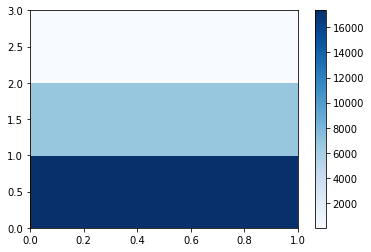

In [36]:
plt.pcolor(model.activation_response(data3).T, cmap='Blues') 
plt.colorbar()
plt.show()

In [37]:
SOM_Cluster=[]
for record in data3:
  SOM_Cluster.append(model.winner(record))

In [38]:
SOM_Cluster_index=[coordiate[0]*4+coordiate[1] for coordiate in SOM_Cluster]

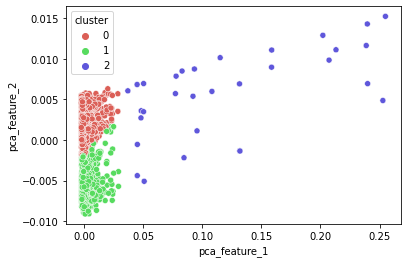

In [39]:
clusters=3
data3 = pd.DataFrame(data3, columns = ['pca_feature_1','pca_feature_2']) # features selected by using PCA
data3['cluster'] = SOM_Cluster_index
sns.scatterplot(data=data3, x=data3.pca_feature_1, y=data3.pca_feature_2, hue='cluster', palette=sns.color_palette("hls",clusters), legend="full")
# plt.scatter(data3.T[1,:],data3.T[0,:],c=SOM_Cluster_index,)

In [40]:
final['cluster'] = SOM_Cluster_index
final = final.sort_values(by = 'cluster', ignore_index=True)
final.head(17000)

,candidateName,companyName,designation,experienceMas,locationCurrentMas,qualificationMas,qualificationMas2,salary,Category,cluster
0,Ramakrishna Kaviti,Surabhi Enterprises,Faculty,31 Year(s),Hyderabad/ Secunderabad,NaN,MBA/ PGDM,Rs. 30.0 lacs,HYDERABAD-SALARIED,0
1,Damodara Tallam,Model N India Software Pvt Ltd,Architect/Associate Director,17 Year(s) 6 Month(s),Hyderabad/ Secunderabad,B.Sc. (Science),MCA/ PGDCA,Rs. 36.0 lacs,HYDERABAD-SALARIED,0
2,syam prasad,Pete Transformers ( PETE - Hammond Power Solu...,Dy.Manager Marketing & Customer Services,10 Year(s) 3 Month(s),Hyderabad/ Secunderabad,B.Com. (Commerce),MBA/ PGDM,Rs. 5.25 lacs,HYDERABAD-SALARIED,0
3,Harsh Arora,Maq Software,Software Engineer,1 Year(s) 9 Month(s),Hyderabad/ Secunderabad,BE/ B.Tech (Engineering),NaN,Rs. 8.25 lacs,HYDERABAD-SALARIED,0
4,Srinivas Santosh,Genpact India Pvt Ltd,Senior Manager Project Management,8 Year(s) 3 Month(s),Hyderabad/ Secunderabad,BE/ B.Tech (Engineering),MBA/ PGDM,Rs. 16.24 lacs,HYDERABAD-SALARIED,0
...,...,...,...,...,...,...,...,...,...,...
16995,nitin deshpande,MSD PHARMACEUTICALS,ASST MANAGER CORPORATE INITIATIVES SOUTH INDIA,23 Year(s) 4 Month(s),Hyderabad/ Secunderabad,B.Sc. (Science),NaN,Rs. 5.5 lacs,HYDERABAD-SALARIED,0
16996,Ayank Jain,HSBC Bank,Vice President,7 Year(s) 6 Month(s),Hyderabad/ Secunderabad,MBA/ PGDM,B.Com. (Commerce),Rs. 24.0 lacs,HYDERABAD-SALARIED,0
16997,Objects Reusability,Microsoft,Development Manager,15 Year(s),Hyderabad/ Secunderabad,MCA/ PGDCA,B.Sc. (Science),Rs. 26.2 lacs,HYDERABAD-SALARIED,0
16998,Jose George,MRF Tyres,Deputy manager,23 Year(s) 4 Month(s),Hyderabad/ Secunderabad,MBA/ PGDM,B.Sc. (Science),Rs. 10.0 lacs,HYDERABAD-SALARIED,0


In [41]:
final.tail(6790)

,candidateName,companyName,designation,experienceMas,locationCurrentMas,qualificationMas,qualificationMas2,salary,Category,cluster
17423,SMRITI GODARA,Zs Associates India Pvt Ltd,Knowledge Management Fellow,2 Year(s),Hyderabad/ Secunderabad,B.Pharm. (Pharmacy),NaN,Rs. 5.0 lacs,HYDERABAD-SALARIED,1
17424,Kameshwari Bhamidi,HCL Technologies Ltd,Senior Technical Manager,14 Year(s),Hyderabad/ Secunderabad,NaN,B.Sc. (Science),Rs. 18.0 lacs,HYDERABAD-SALARIED,1
17425,Santhosh Kumar C,Cognizant Technology Solutions,Associate,3 Year(s) 9 Month(s),Hyderabad/ Secunderabad,BE/ B.Tech (Engineering),NaN,Rs. 5.7 lacs,HYDERABAD-SALARIED,1
17426,Krishna Yeddanapudi,Infosys Technologies Ltd,Test Analyst,9 Year(s) 6 Month(s),Hyderabad/ Secunderabad,MBA/ PGDM,BE/ B.Tech (Engineering),Rs. 8.15 lacs,HYDERABAD-SALARIED,1
17427,Santhosh Reddy Pulugari,Cts Pvt. Ltd.,Senior Analyst,8 Year(s),Hyderabad/ Secunderabad,NaN,M.Sc. (Science),Rs. 12.0 lacs,HYDERABAD-SALARIED,1
...,...,...,...,...,...,...,...,...,...,...
24208,Rohit Botta,Bank Of America,Senior Analyst,6 Year(s) 1 Month(s),Hyderabad/ Secunderabad,BE/ B.Tech (Engineering),MBA/ PGDM,Rs. 6.7 lacs,HYDERABAD-SALARIED,2
24209,Nikhil Rao,Lukup Media Pvt Ltd,Asst Manager Marketing,2 Year(s) 5 Month(s),Hyderabad/ Secunderabad,NaN,MBA/ PGDM,Rs. 5.75 lacs,HYDERABAD-SALARIED,2
24210,Parveen Shaik,Jpmorgan Chase & Co,Database Analyst,4 Year(s) 11 Month(s),Hyderabad/ Secunderabad,B.Sc. (Science),NaN,Rs. 7.0 lacs,HYDERABAD-SALARIED,2
24211,A PONMURUGU ARUMUGAM,Israq cotton mills ltd,General Manager - Tech,27 Year(s) 4 Month(s),Hyderabad/ Secunderabad,Diploma-Other Diploma,NaN,Rs. 12.6 lacs,HYDERABAD-SALARIED,2


# Comparison
*  Three algorithms performs better and produced 3 clusters each.
*  Among them, i found that KMeans and SOM algorithms produced relatively equal distribution of clusters.
*  When i verified the sample datapoints with provided clusters, i found that SOM produced almost accurate results as i thought. 
*  So, i prefer Self- organizing feature maps algorithm to form clusters for this dataset.

# Conclusion
**From the formed clusters i found that**
*  Cluster 0 represents the employees are well settled and still struggling 
*  Cluster 1 represents the employees are stress-less living employees(they are happy with what they have)
*  Cluster 2 represents the employees are not greatly settled


> (the ranges of settlement forming is based on designation the employee posses(either valuable or high authorized or less), companyname(either highly reputed or less), experienced(either well experienced or fresher), qualification(the study qualifications they have), salary(the salary they posses))

